# AI-Driven Credit Risk Prediction and Customer Scoring System

**Objective:**
To develop a machine learning-based system that:
1. Predicts credit default risk of customers (classification: default or no default),
2. Generates customer credit scores using AI-based scoring logic.



# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Loading Data

In [2]:
df= pd.read_csv('Loan_default.csv')

# Exploratory Data Analysis Report (EDA)

In [3]:
df.shape

(255347, 18)

In [4]:
df.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [5]:
df.duplicated().sum() 

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [8]:
df.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')

# Visualization

**Default Vs Non-Default**

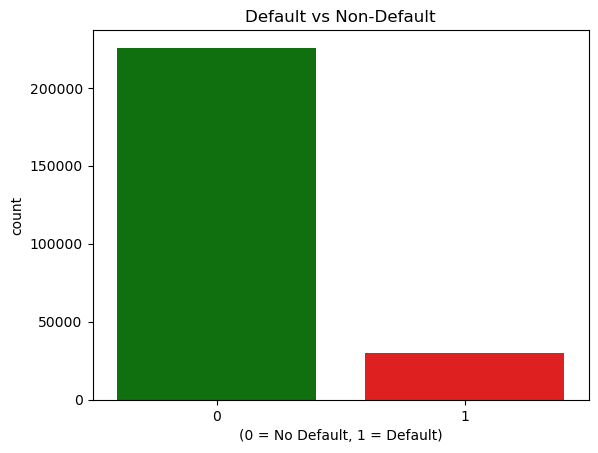

In [12]:
colors = ['green', 'red']  # 0: No Default (Green), 1: Default (Red)
sns.countplot(data=df, x='Default',palette=colors)
plt.title("Default vs Non-Default")
plt.xlabel('(0 = No Default, 1 = Default)')
plt.show()

**Distribution of Nmerical Features**

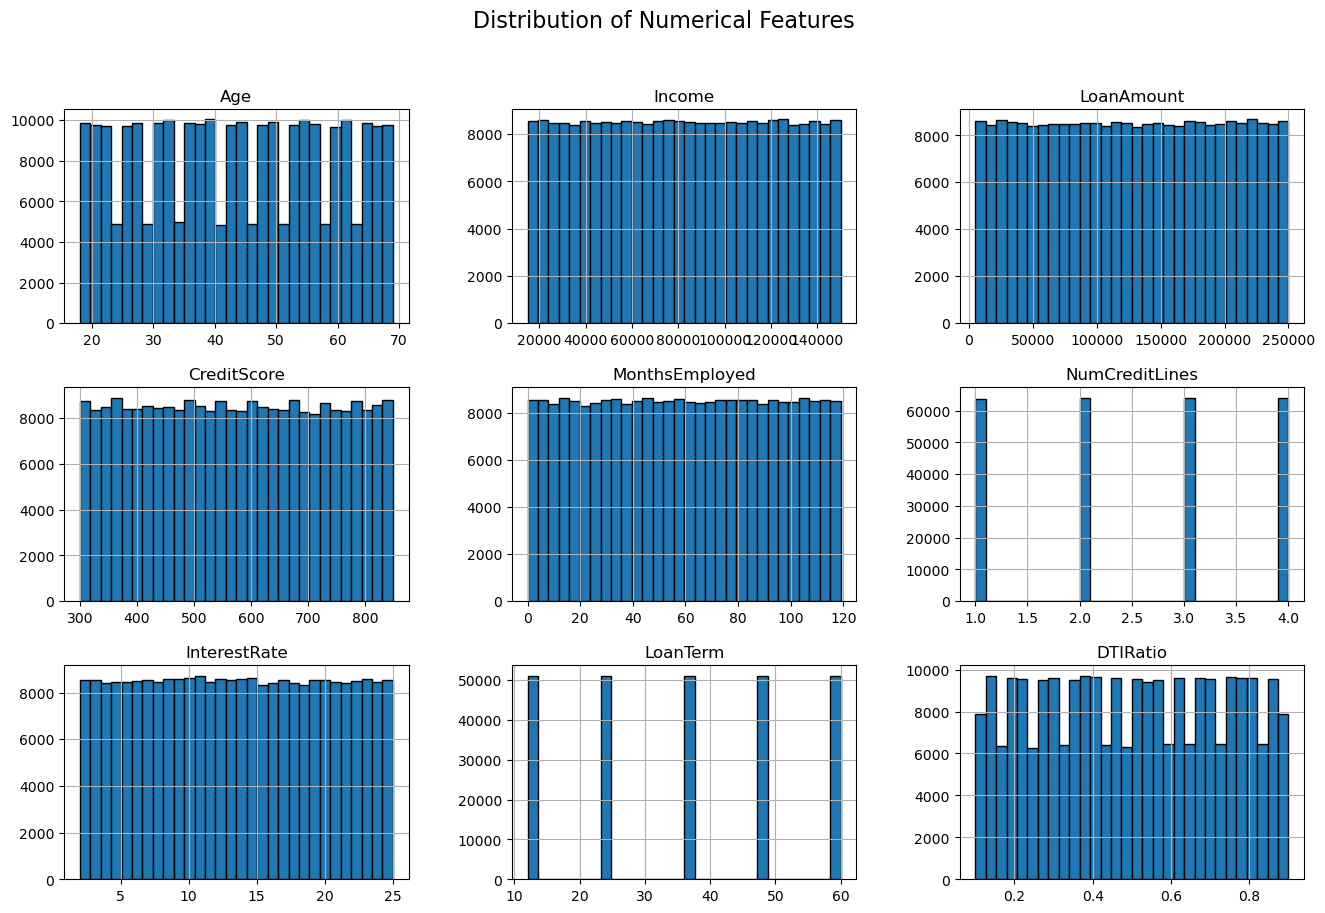

In [16]:
num_cols = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
            'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']

# Plot histograms
df[num_cols].hist(figsize=(16, 10), bins=30, edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()


**Correlation Heatmap with Default**

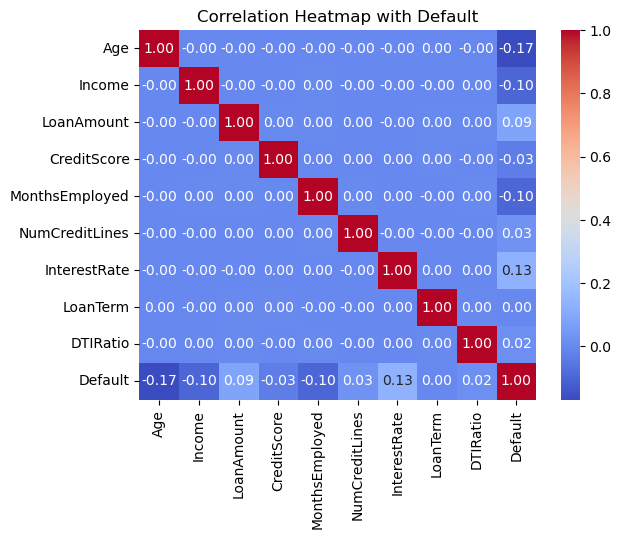

In [20]:
sns.heatmap(df[num_cols + ['Default']].corr(), annot=True, cmap='coolwarm',fmt=".2f")
plt.title("Correlation Heatmap with Default")
plt.show()


**Default Rate by Categorical Features**

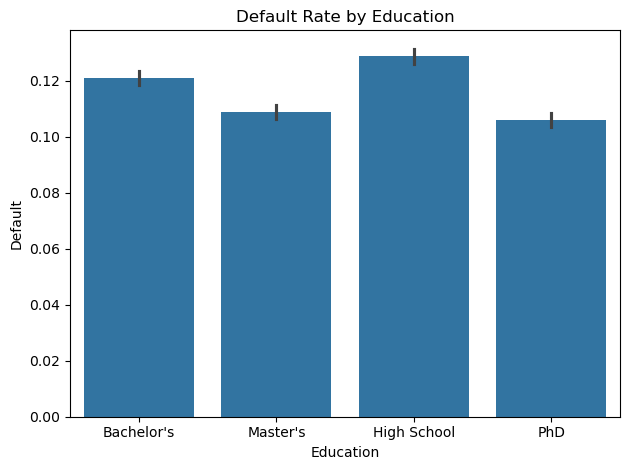

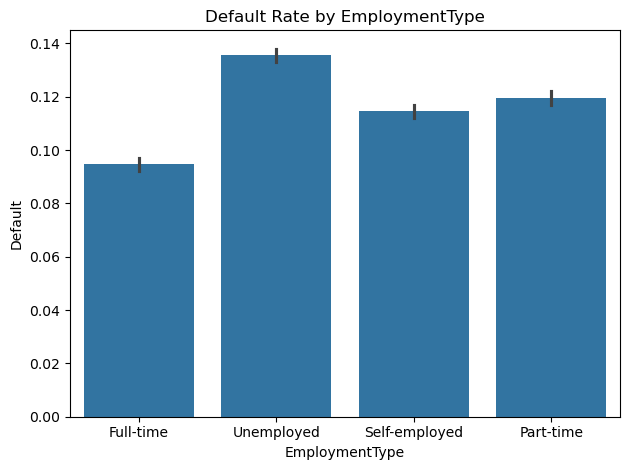

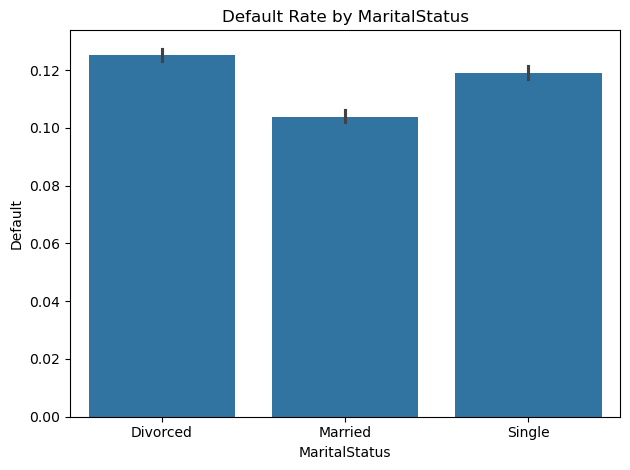

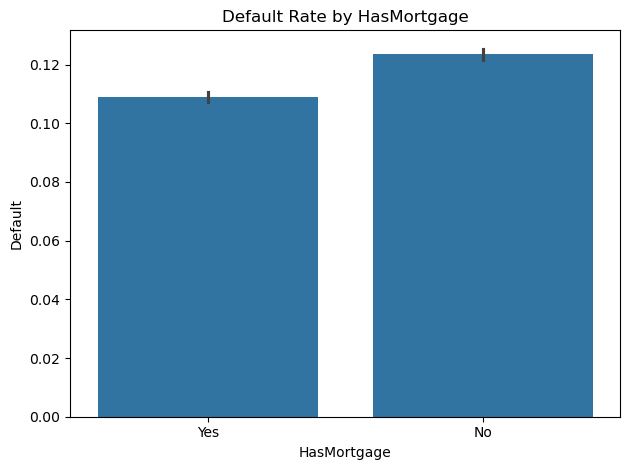

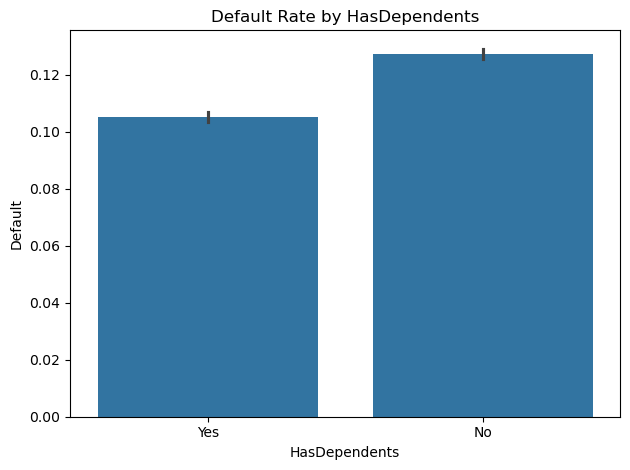

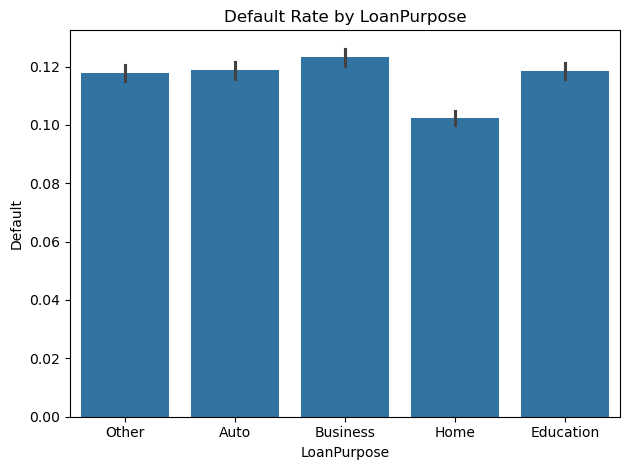

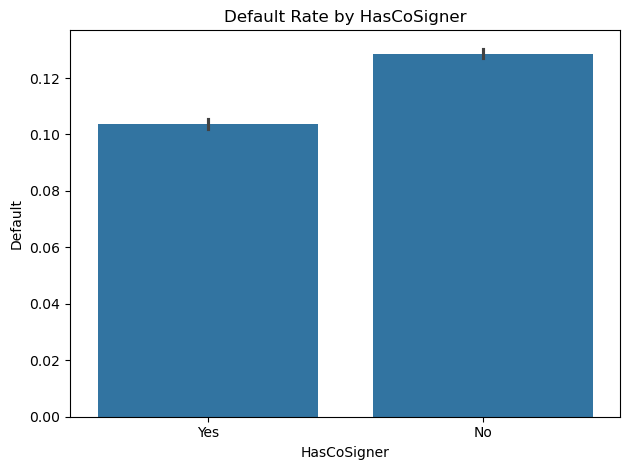

In [23]:
cat_cols = ['Education', 'EmploymentType', 'MaritalStatus', 
            'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']

for col in cat_cols:
    
    sns.barplot(x=col, y='Default', data=df)
    plt.title(f"Default Rate by {col}")
    plt.tight_layout()
    plt.show()


# Data Preprocessing 

**Droping Unnecessary Column**


In [26]:
df = df.drop(columns=['LoanID'])


In [28]:
df.columns

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Education',
       'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents',
       'LoanPurpose', 'HasCoSigner', 'Default'],
      dtype='object')

# Encoding Categorical Features

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [31]:
cat_cols = ['Education', 'EmploymentType', 'MaritalStatus', 
            'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']

label_encoders = {}
for col in cat_cols:
    
    df[col] = le.fit_transform(df[col])
   


In [35]:
df.head(5)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,0,0,0,1,1,4,1,0
1,69,50432,124440,458,15,1,4.81,60,0.68,2,0,1,0,0,4,1,0
2,46,84208,129188,451,26,3,21.17,24,0.31,2,3,0,1,1,0,0,1
3,32,31713,44799,743,0,3,7.07,24,0.23,1,0,1,0,0,1,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,0,3,0,0,1,0,0,0


# Scaling Numerical Features

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [37]:
num_cols = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
            'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']
df[num_cols] = scaler.fit_transform(df[num_cols])

In [38]:
df.head(5)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,0.833990,0.089693,-1.086833,-0.341492,0.590533,1.341937,0.261771,-0.001526,-0.260753,0,0,0,1,1,4,1,0
1,1.701221,-0.823021,-0.044309,-0.731666,-1.285731,-1.343791,-1.308350,1.412793,0.778585,2,0,1,0,0,4,1,0
2,0.166888,0.043854,0.022715,-0.775718,-0.968209,0.446694,1.156831,-0.708685,-0.823728,2,3,0,1,1,0,0,1
3,-0.767053,-1.303452,-1.168538,1.061875,-1.718715,0.446694,-0.967805,-0.708685,-1.170174,1,0,1,0,0,1,0,0
4,1.100830,-1.592855,-1.671921,0.369631,-1.487790,1.341937,-1.052188,0.705634,0.995114,0,3,0,0,1,0,0,0


# Train Test Split

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x = df.drop('Default', axis=1)
y = df['Default']

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Model Building

# Logistic Regression Model

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [44]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [45]:
y_pred_log = log_reg.predict(x_test)
y_pred_log 

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [46]:
accuracy_log = accuracy_score(y_test, y_pred_log)

In [65]:
print("Logistic Regression Results")
print("Accuracy:", round(accuracy_log, 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

Logistic Regression Results
Accuracy: 0.8851

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     45139
           1       0.61      0.03      0.06      5931

    accuracy                           0.89     51070
   macro avg       0.75      0.51      0.50     51070
weighted avg       0.85      0.89      0.84     51070

Confusion Matrix:
 [[45021   118]
 [ 5749   182]]


# Decision Tree Model

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [50]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [51]:
y_pred_dt = dt_model.predict(x_test)
y_pred_dt 

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [52]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)

In [66]:
print("Decision Tree Classifier Results")
print("Accuracy:", round(accuracy_dt, 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Decision Tree Classifier Results
Accuracy: 0.8029

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89     45139
           1       0.20      0.23      0.21      5931

    accuracy                           0.80     51070
   macro avg       0.55      0.55      0.55     51070
weighted avg       0.82      0.80      0.81     51070

Confusion Matrix:
 [[39646  5493]
 [ 4572  1359]]


# Random Forest Model

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [56]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [57]:
y_pred_rf = rf_model.predict(x_test)
y_pred_rf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [58]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)

In [67]:
print("Random Forest Classifier Results")
print("Accuracy:", round(accuracy_rf, 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Classifier Results
Accuracy: 0.8857

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     45139
           1       0.60      0.05      0.09      5931

    accuracy                           0.89     51070
   macro avg       0.74      0.52      0.51     51070
weighted avg       0.85      0.89      0.84     51070

Confusion Matrix:
 [[44956   183]
 [ 5656   275]]


# XG Boost Model

In [60]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [61]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(x_train, y_train)

C:\Users\shriy\anaconda3\Anaconda\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:51:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [62]:
y_pred_xgb = xgb_model.predict(x_test)
y_pred_xgb

array([0, 0, 0, ..., 0, 0, 0])

In [63]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

In [68]:
print("XGBoost Classifier Results")
print("Accuracy:", round(accuracy_xgb, 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

XGBoost Classifier Results
Accuracy: 0.8849

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94     45139
           1       0.53      0.08      0.14      5931

    accuracy                           0.88     51070
   macro avg       0.71      0.54      0.54     51070
weighted avg       0.85      0.88      0.85     51070

Confusion Matrix:
 [[44703   436]
 [ 5444   487]]


# Saving Model

In [69]:
import joblib

In [70]:
joblib.dump(xgb_model, 'model.pkl')

['model.pkl']